# Project: Investigation of US Census and National Instant Criminal Check datasets


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The goal of this project is to investigate US Census and FBI NICS datasets to determine if poverty has an influence on the number of firearms used as security for loan, i.e. pawned.
To explore this question I will load, wrangle, analyse and make conclusions with these two datasets.

In [2]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# load data
df_nics = pd.read_excel('gun_data.xlsx')
df_census = pd.read_csv('U.S. Census Data.csv')

In [3]:
df_nics.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


Both datasets loaded successfully. Next I'll take a look at both datasets to check on data types and, since I'm looking at data on a state-by-state basis, I'll check the NICS data for surprises. I can already see that the Census data only contains the 50 states. (52 columns, 2 of which are fact and fact notes)

In [5]:
# printing datatypes with counts
print('NICS datatypes: {}'.format(df_nics.dtypes.value_counts()))
print('Unique States in NICS Data: {}'.format(df_nics.state.nunique()))
print('******')
print('Census datatypes: {}'.format(df_census.dtypes.value_counts()))


NICS datatypes: float64    23
object      2
int64       2
dtype: int64
Unique States in NICS Data: 55
******
Census datatypes: object    52
dtype: int64


There appears to be a mix of data types. I can already see that the US Census data contains non-integer characters, indicating that each column value is a string instead of a numeric type. Also, the NICS data contains values representing the number of background checks conducted in all 50 states (and DC, Virgin Islands, Puerto Rico, Mariana Islands, and Guam) on monthly basis. The census data only contains information about the 50 US States. I will have to reconcile that difference.

In the Census data, I have identified four data points that I think are relevant to my question: 'population', 'median_income', 'per_capita_income', and 'poverty_percentage.' I will work on the Census data after I get the NICS data to a workable form.

Let's take a look first at the time-frame of the NICS data. Since the census data covers the year 2016, I need to make sure that the entire year 2016 is also present in the NICS data. 

In [6]:
# finding the earlies and latest entries in the NICS data 
latest = df_nics.month.max()
earliest = df_nics.month.min()
# printing the same
print('The earliest month recorded is: {}'.format(earliest))
print('The latest month recorded is: {}'.format(latest))

The earliest month recorded is: 1998-11
The latest month recorded is: 2017-09


Looks like I need to do some filtering to get data for only the year 2016.

# Data Wrangling
The first step for the NICS data is to remove the 5 'states' that aren't also present in the Census data. I'll accomplish this by simple filtering. I'll check the shape of the dataframe before filtering and again after. If the filtering was successful, the dataframe should be smaller.

In [7]:
df_nics.shape

(12485, 27)

In order to select states that are not in this list, I'll use the .isin() method to select all rows that meet this criteria.

In [8]:
# list of locations to drop from the NICS data
toDrop = ['District of Columbia', 'Virgin Islands', 'Puerto Rico', 'Mariana Islands', 'Guam']
# dropping and copying to new dataframe
df_nics_v1 = df_nics[~df_nics['state'].isin(toDrop)]
df_nics_v1.set_index('state')
# verify the shape change to indicate removal
df_nics_v1.shape

(11350, 27)

Now that the 5 extra 'states' have been removed, I can filter for the year 2016.

In [9]:
# set the date range for 2016
startdate = '2016-01'
enddate= '2016-12'
# select only rows with dates between startdate and enddate and copy to new dataframe 
df_nics_v2 = df_nics_v1[df_nics_v1['month'].between(startdate, enddate, inclusive="both")]
df_nics_v2.shape

(600, 27)

Perfect. I now have the 600 rows that were expected for this 12 month period (50 x 12.) Next I'll check if there are any missing data points in this 12 month period. 

In [10]:
df_nics_v2['month'].value_counts()

2016-12    50
2016-11    50
2016-10    50
2016-09    50
2016-08    50
2016-07    50
2016-06    50
2016-05    50
2016-04    50
2016-03    50
2016-02    50
2016-01    50
Name: month, dtype: int64

Looks like there are no missing values. Even a value of "0" will be relevant to my question.

Next I'll remove all columns other than the prepawn and redemption columns, I'll group the individual states and aggregate the prepawn and redemption columns together.

In [11]:
# create list of columns
nics_list = ['state', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 'redemption_other']
# grouping by state
df_nics_v3 = df_nics_v2[nics_list].groupby('state').sum()
# aggregating prepawn and redemption columns into total columns for each
df_nics_v3['prepawn_total'] = df_nics_v3['prepawn_handgun'] + df_nics_v3['prepawn_long_gun'] + df_nics_v3['prepawn_other']
df_nics_v3['redemption_total'] = df_nics_v3['redemption_handgun'] + df_nics_v3['redemption_long_gun'] + df_nics_v3['redemption_other']
# updating this dataframe to only contain the total columns
df_nics_v3 = df_nics_v3[['prepawn_total', 'redemption_total']]
# verify changes
df_nics_v3.head()


,prepawn_total,redemption_total
state,,
Alabama,227.0,37795.0
Alaska,154.0,4304.0
Arizona,137.0,25044.0
Arkansas,196.0,33206.0
California,0.0,13574.0


Now that the columns have been simplified, I should change their data type since the FBI does not conduct partial background checks.

In [12]:
# change datatypes to int and copy to new final NICS dataframe
df_nics_final = df_nics_v3.astype(int)
# verify changes
df_nics_final.head()

,prepawn_total,redemption_total
state,,
Alabama,227,37795
Alaska,154,4304
Arizona,137,25044
Arkansas,196,33206
California,0,13574


Great! The Census dataframe needs a little bit more work to prepare for the merge. I need to: Filter the data that I'm interested in (population, median household income, per-capita income, and persons in poverty), rename the row indexes, drop the 'Fact' and 'Fact Note' columns, change the value data types appropriately, and reorient the data frame to match the NICS data frame. 

First to filter the rows that I want so I'm working on fewer rows at a time. I'll filter by row index: rows 1, 48, 49, 50. This data is 0 indexed, so I'll subtract 1 from these row numbers to filter.

In [13]:
# copy selected rows to new dataframe
df_census_v1 = df_census.iloc[[0, 47, 48, 49]]
# verify changes
df_census_v1.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
47,"Median household income (in 2015 dollars), 201...",NaN,"$43,623","$72,515","$50,255","$41,371","$61,818","$60,629","$70,331","$60,509",...,50957,45219,"$53,207","$60,727","$55,176","$65,015","$61,062","$41,751","$53,357","$58,840"
48,Per capita income in past 12 months (in 2015 d...,NaN,"$24,091","$33,413","$25,848","$22,798","$30,318","$32,217","$38,803","$30,554",...,26747,25227,"$26,999","$24,686","$29,894","$34,152","$31,762","$23,450","$28,340","$29,803"
49,"Persons in poverty, percent",NaN,17.10%,9.90%,16.40%,17.20%,14.30%,11.00%,9.80%,11.70%,...,0.133,0.158,15.60%,10.20%,11.90%,11.00%,11.30%,17.90%,11.80%,11.30%


Down to the required 4 rows. Next I'll drop the 'Fact' and 'Fact Note' columns and then rename the columns for ease of use.

In [14]:
# drop unnecessary columns and copy to new dataframe
df_census_v2 = df_census_v1.drop(columns=['Fact', 'Fact Note'])
# create list of columns
census_list = ['population', 'median_income', 'per_capita_income', 'poverty_percentage']
# renaming colums inplace
df_census_v2.set_axis(census_list, axis='index', inplace=True)
#verify changes
df_census_v2

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
population,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
median_income,"$43,623","$72,515","$50,255","$41,371","$61,818","$60,629","$70,331","$60,509","$47,507","$49,620",...,50957,45219,"$53,207","$60,727","$55,176","$65,015","$61,062","$41,751","$53,357","$58,840"
per_capita_income,"$24,091","$33,413","$25,848","$22,798","$30,318","$32,217","$38,803","$30,554","$26,829","$25,737",...,26747,25227,"$26,999","$24,686","$29,894","$34,152","$31,762","$23,450","$28,340","$29,803"
poverty_percentage,17.10%,9.90%,16.40%,17.20%,14.30%,11.00%,9.80%,11.70%,14.70%,16.00%,...,0.133,0.158,15.60%,10.20%,11.90%,11.00%,11.30%,17.90%,11.80%,11.30%


I need to swap this data frame's axes in order for it to line up to df_nics_final. I'll go ahead and do that now.

In [15]:
# transpose dataframe
df_census_v3 = df_census_v2.transpose()
# verify changes
df_census_v3.head()

,population,median_income,per_capita_income,poverty_percentage
Alabama,"4,863,300","$43,623","$24,091",17.10%
Alaska,"741,894","$72,515","$33,413",9.90%
Arizona,"6,931,071","$50,255","$25,848",16.40%
Arkansas,"2,988,248","$41,371","$22,798",17.20%
California,"39,250,017","$61,818","$30,318",14.30%


Now to remove all special characters and then ensure that all collumns have the correct datatype. All columns should be type int, except for poverty_percentage which will be type float.

In [16]:
# replacing special characters inplace
df_census_v3.iloc[:].replace('[\%,$]', '', regex=True, inplace=True)
# converting from string to numeric type
df_census_v3 = df_census_v3.apply(pd.to_numeric, errors='ignore')
#verify special characters removed
df_census_v3.head()

,population,median_income,per_capita_income,poverty_percentage
Alabama,4863300,43623,24091,17.1
Alaska,741894,72515,33413,9.9
Arizona,6931071,50255,25848,16.4
Arkansas,2988248,41371,22798,17.2
California,39250017,61818,30318,14.3


This looks like a good place to set a new working version/copy of the census dataframe and work on fixing the percentages. These values are expressed either as percentages or as a decimal value. For ease of use later, I'll format these as decimal values by simply changing the datatype of the values in that column. I'll also create a new column that converts the percentage of people living under the poverty line to a whole number.

In [17]:
# copy to new dataframe for next step
df_census_v4 = df_census_v3
# formatting percentages to decimal values
df_census_v4['poverty_percentage'] = df_census_v4.iloc[:,3].apply(lambda x: (x / 100 if x > 1 else x))
# creating new colum poverty_population expressign poverty_percentage as number of individuals
df_census_v4['poverty_population'] = df_census_v4['population'] * df_census_v4['poverty_percentage']
# changing datatype of poverty_population collumn to int
df_census_v4['poverty_population'] = df_census_v4['poverty_population'].astype(int)
# copy to new dataframe
df_census_final = df_census_v4
#verify changes
df_census_final.head()

,population,median_income,per_capita_income,poverty_percentage,poverty_population
Alabama,4863300,43623,24091,0.171,831624
Alaska,741894,72515,33413,0.099,73447
Arizona,6931071,50255,25848,0.164,1136695
Arkansas,2988248,41371,22798,0.172,513978
California,39250017,61818,30318,0.143,5612752


Now to join the data frames together.


In [18]:
# using .join to combine nics_final and census_final
df_combined = df_nics_final.join(df_census_final)
# setting index name to 'states'
df_combined.index.name='states'
# verify changes
df_combined.head()

,prepawn_total,redemption_total,population,median_income,per_capita_income,poverty_percentage,poverty_population
states,,,,,,,
Alabama,227,37795,4863300,43623,24091,0.171,831624
Alaska,154,4304,741894,72515,33413,0.099,73447
Arizona,137,25044,6931071,50255,25848,0.164,1136695
Arkansas,196,33206,2988248,41371,22798,0.172,513978
California,0,13574,39250017,61818,30318,0.143,5612752


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1
Is there any correlation between the number of NICS prepawn background checks and the percentage of the population living under the poverty line? 

In the next few cells I'll chart the total instances of these bacground checks and the percentage of the population living under the poverty line on a state-by-state basis. 

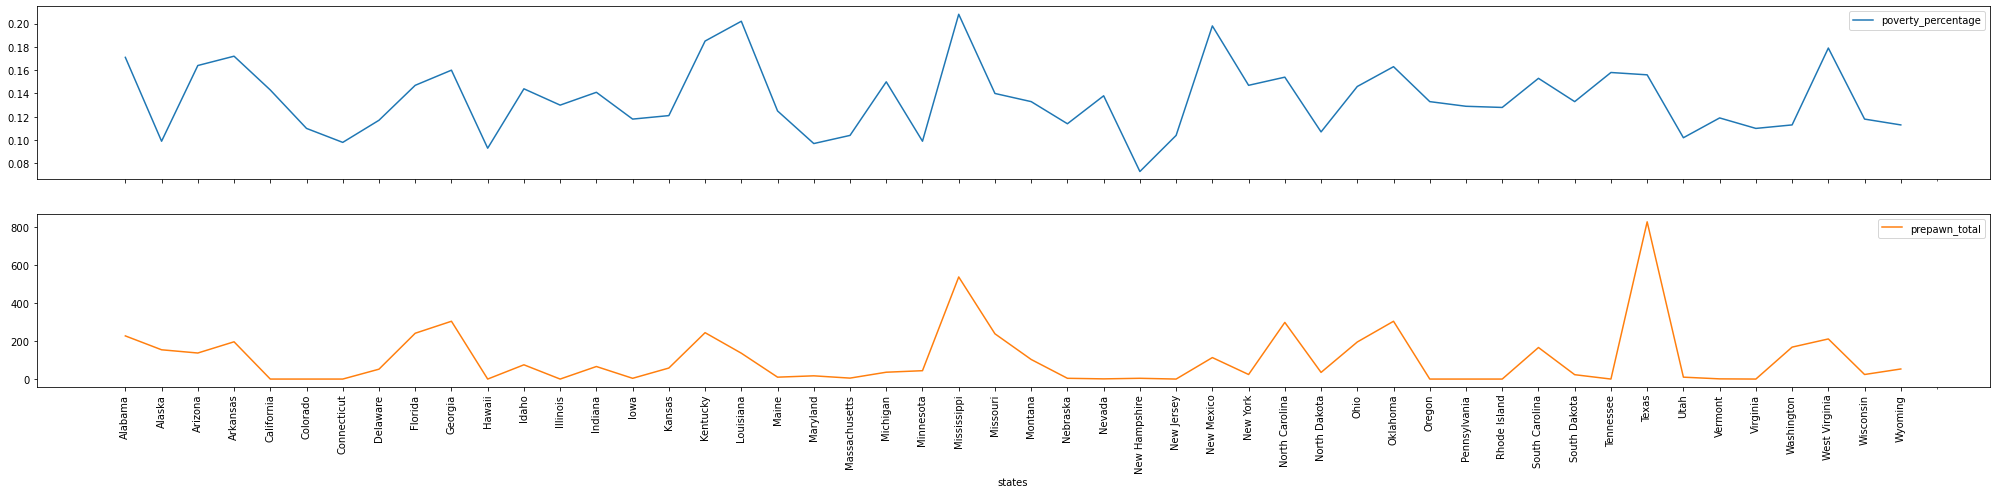

In [19]:
# generate plots for poverty_percentage and prepawn_total
df_combined.plot(y=['poverty_percentage', 'prepawn_total'], subplots=True, sharex=True, figsize=(35,7))
# setting x axis labels
plt.xticks(range(0, len(df_combined.index)), df_combined.index, rotation='vertical')
plt.show()

This already looks promising. There are several spots where both charts share peaks and valleys. Mississippi looks like it has about the highest correlation. Texas has the highest prepawn_total value, but the percentage of the population living under the poverty line isn't matching up. I'll pull these cells to see whats going on.

In [20]:
print('Max Prepawn Total: {}'.format(df_combined['prepawn_total'].max()))
print('Max Poverty Percentage: {:.3f}'.format(df_combined['poverty_percentage'].max()))
print('Mean Per-Capita Income: {}'.format(df_combined['per_capita_income'].mean()))
print('***********')
print('Texas Prepawn Total: {}'.format(df_combined.loc['Texas']['prepawn_total']))
print('Texas Per-Capita Income: {}'.format(df_combined.loc['Texas']['per_capita_income']))
print('***********')
print('Mississippi Poverty Percentage: {:.3f}'.format(df_combined.loc['Mississippi']['poverty_percentage']))

Max Prepawn Total: 827
Max Poverty Percentage: 0.208
Mean Per-Capita Income: 28491.78
***********
Texas Prepawn Total: 827.0
Texas Per-Capita Income: 26999.0
***********
Mississippi Poverty Percentage: 0.208


Mississippi has the highest poverty rate in the nation, and Texas has the highest number of prepawn background checks and a relatively average per-capita income.
Next we'll take a look at the relationship between these two variables.

In [21]:
# creating a function to generate scatter plot
def basicScatterPlot(df, xVar, yVar):
    '''
    This function takes three arguments and outputs a basic scatterplot with two variables.
    Arguments:
    df (pandas.Dataframe): dataframe containing the data
    xVar (str): column to be used as x variable
    yVar (str): column to be used as y variable
    '''
    # plotting the data
    df.plot(kind='scatter', x=xVar, y=yVar, figsize=(14, 6), s=10);
    # formatting the variable names to remove underscores for better readability
    xVar=xVar.replace('_', ' ')
    yVar=yVar.replace('_', ' ')
    # setting and formatting the title
    plt.title(f'Relationship between {yVar} and {xVar}'.title(), fontsize = 14, weight = 'bold')
    # setting and formatting the variable labels
    plt.xlabel(xVar.title(), fontsize = 10, weight = 'bold')
    plt.ylabel(yVar.title(), fontsize = 10, weight = 'bold')

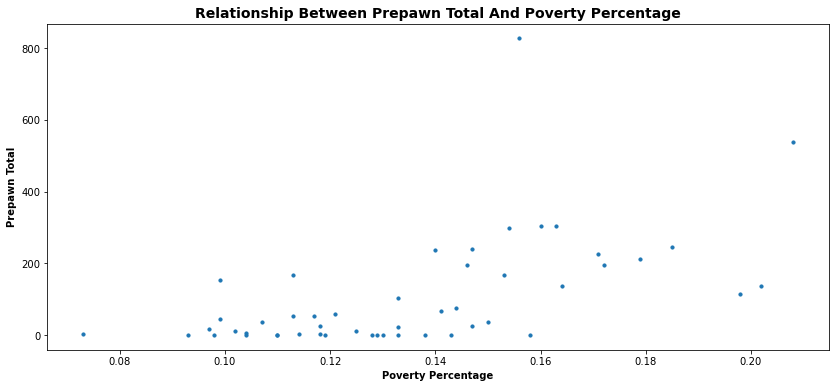

In [22]:
# calling plot function
basicScatterPlot(df_combined, 'poverty_percentage', 'prepawn_total')

In [23]:
# creating a function to return correlation coefficient between variables
def basicCorrelation(df, var1 , var2 ):
    '''
    This function takes three arguments and returns the correlation coefficient (r value) between two variables.
    Arguments:
    df (pandas.Dataframe): dataframe containing the data
    var1 (str): column to be used as 1st variable
    var2 (str): column to be used as 2nd variable
    '''
    rValue = df[var1].corr(df[var2])
    print('{:.3f}'.format(rValue))

In [24]:
# calling correlation function
basicCorrelation(df_combined, 'poverty_percentage', 'prepawn_total')

0.558


This r value indicates that there is a moderate positive correlation between these two variables.

### Question 2
Is the inverse true? In states with a higher per-capita or median income, is the population more likely to have a higher rate of background checks conducted for the purpose of releasing a firearm from a pawn shop?

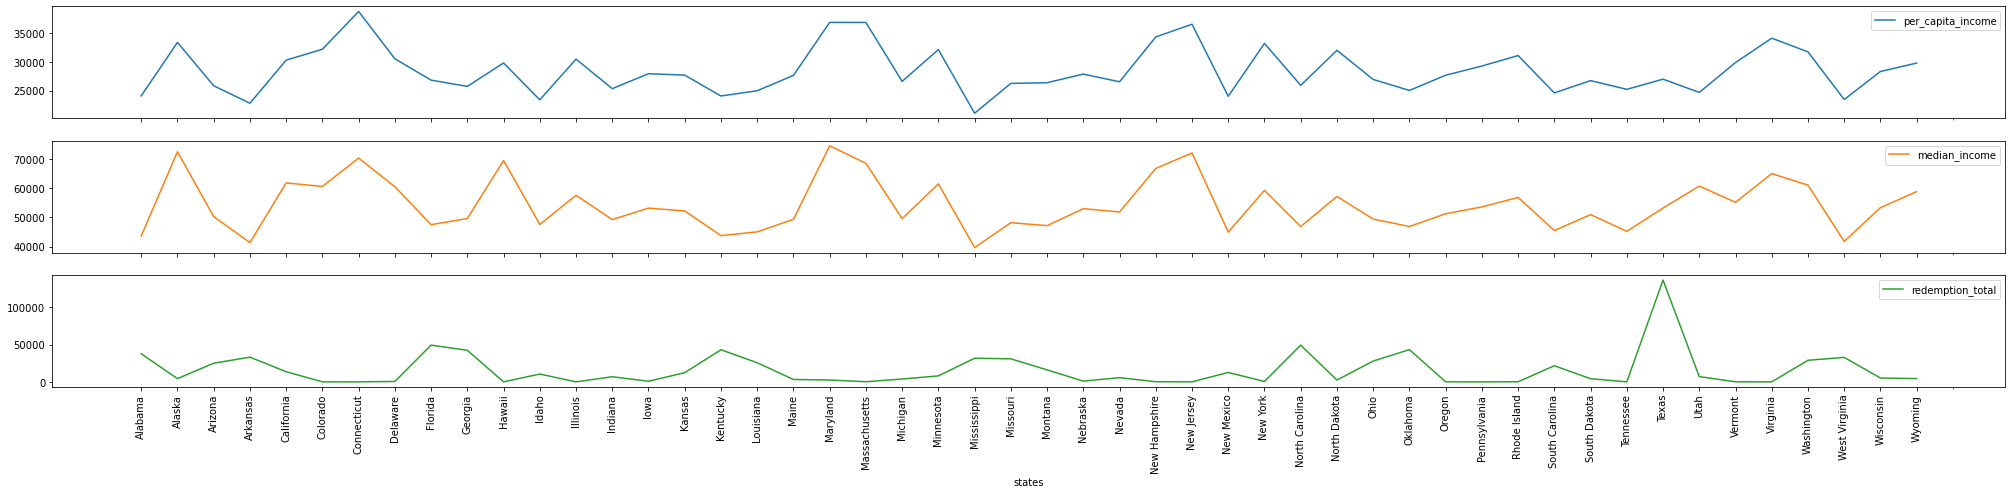

In [25]:
df_combined.plot(y=['per_capita_income', 'median_income', 'redemption_total'], subplots=True, sharex=True, figsize=(35, 7))
plt.xticks(range(0, len(df_combined.index)), df_combined.index, rotation='vertical')
plt.show()

In [26]:
basicCorrelation(df_combined, 'median_income', 'per_capita_income')

0.914


Since per-capita income and median_income share such a strong postive correlation, I'm going to consider them one and the same for the purpose of this question and ask again: Does a higher income population redeem firearms from pawn shops at a higher rate? 

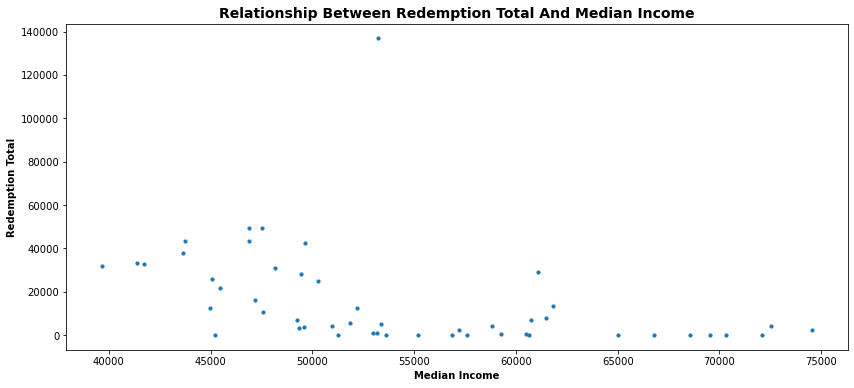

In [28]:
basicScatterPlot(df_combined, 'median_income', 'redemption_total')

To take a better look at the data, I'll remove Texas's redemption_total datapoint, since it is starting to appear that Texas is an outlier in the data.

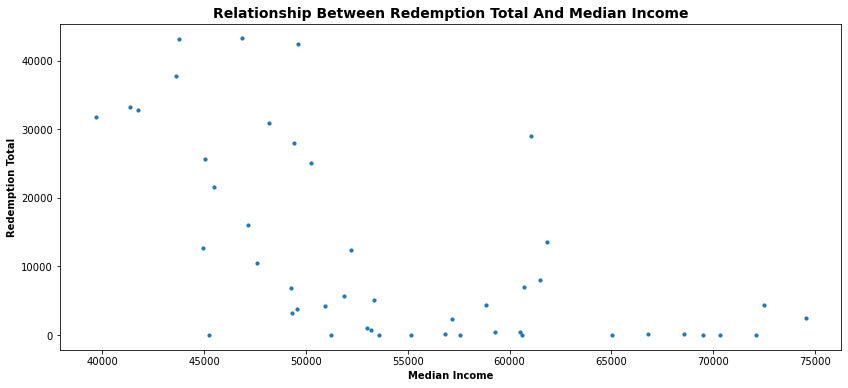

In [37]:
basicScatterPlot(df_combined.query('redemption_total<redemption_total.quantile(0.95)'), 'median_income', 'redemption_total')

In [34]:
basicCorrelation(df_combined, 'redemption_total', 'median_income')

-0.415


This r value indicates a moderate negative correlation between these two variables.

### Question 3
Is there a relationship between the number of people living under the poverty line and using a firearm as collateral to secure a loan?

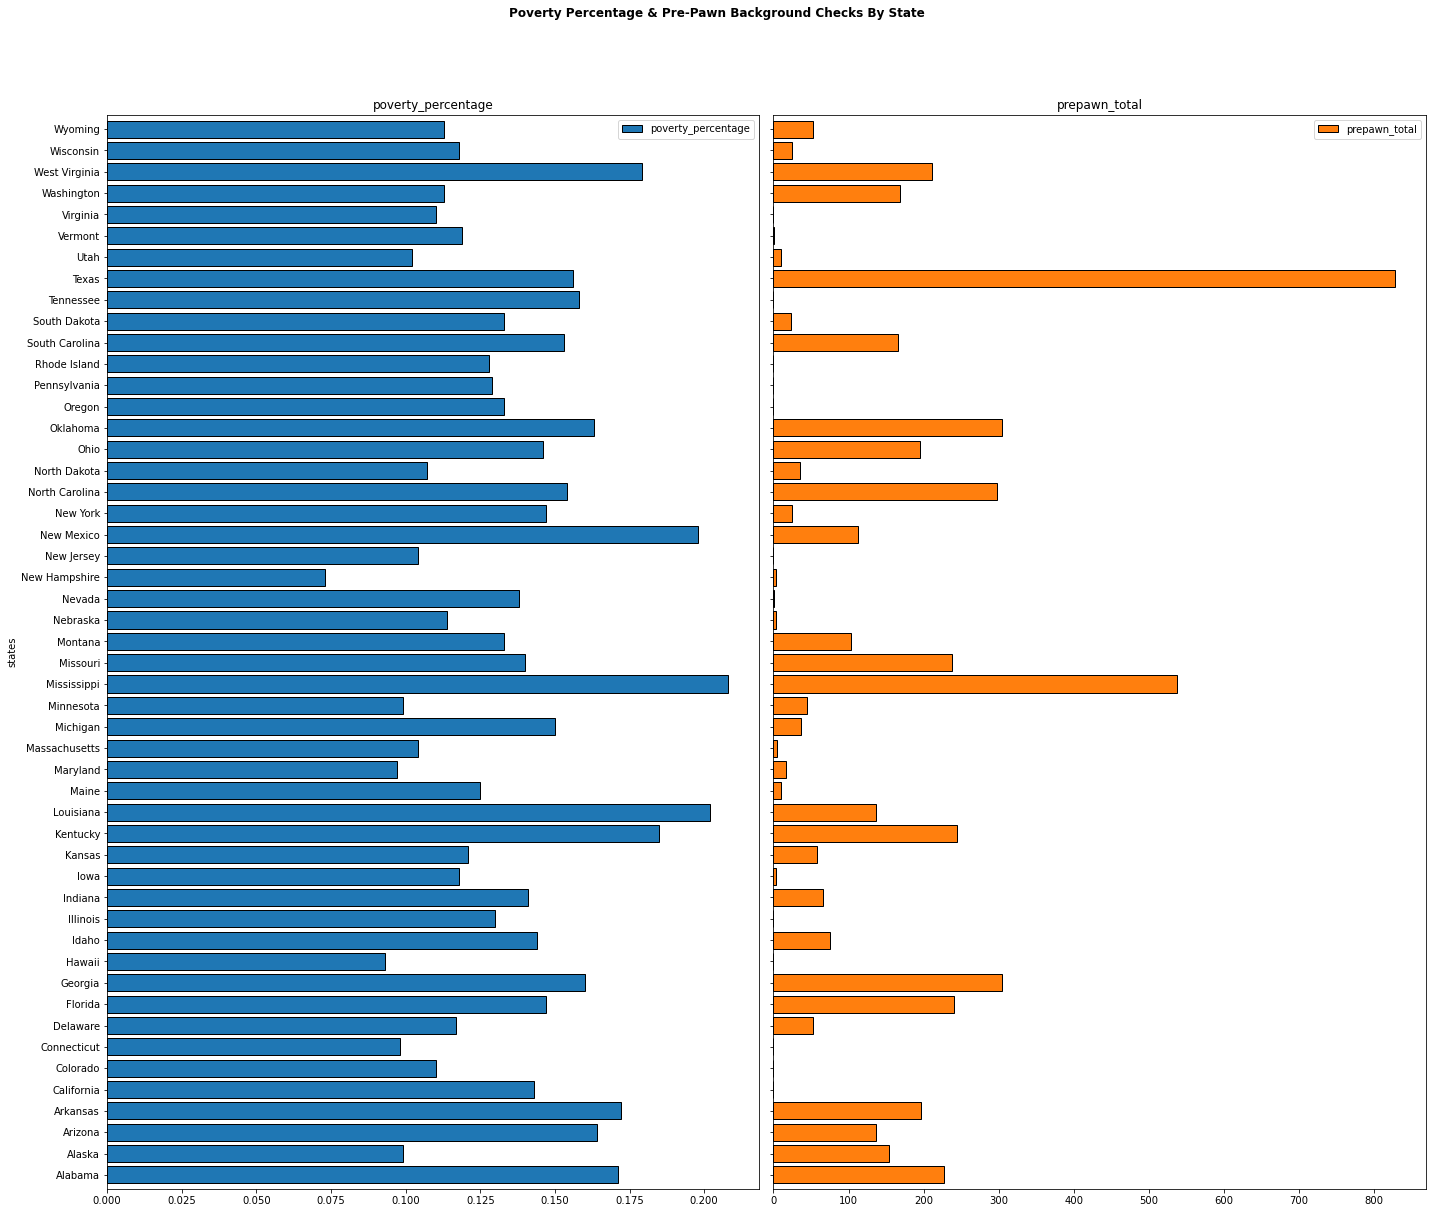

In [29]:
# generate plots for poverty_percentage and prepawn_total
df_combined.plot.barh(y=['poverty_percentage', 'prepawn_total'], subplots=True, layout=[1,2], sharex=False, sharey=True,
                      figsize=(20,16), edgecolor='black', width=0.8)
plt.suptitle('Poverty Percentage & Pre-Pawn Background Checks by state'.title(), y=1.05, weight='bold')
plt.tight_layout()
plt.show()

In [35]:
basicCorrelation(df_combined, 'poverty_population', 'prepawn_total')

0.366


This r value indicates a weak negative relationship.

<a id='conclusions'></a>
# Conclusions

### Question 1
Is there any correlation between the number of NICS prepawn background checks and the percentage of the population living under the poverty line? 

In short, yes. While there is only a moderate postive relationship between these two variables, if I were to control for the politics around firearms for each state I believe the correlation would be even greater. Well, with the exception of Texas, that is. Texas leads in both prepawn and redemption background checks while having a rather average median/per-capita income. If I remove both California and Texas (I've chosen both because they're political opposites) from this data, this correlation does get stronger.

So the long answer to the question, "Can you predict which states have higher rates of using firearms as security for a loan based on the percentage of the population living under the poverty line?" is, "Yes, but not in Texas or California."

In [38]:
# drop the Texas and California columns and copy to new dataframe
df_no_outliers = df_combined.drop(['California', 'Texas'])
basicCorrelation(df_no_outliers, 'poverty_percentage', 'prepawn_total')

0.674


### Question 2
Is the inverse true? In states with a higher per-capita or median income, is the population more likely to have a higher rate of background checks conducted for the purpose of releasing a firearm from a pawn shop?

The answer here is no. We see a moderate negative relationship between these two variables. In fact, removing California and Texas makes this correlation even stronger. I suspect that this is because the populations living in states with higher per-captia incomes do not tend to pawn firearms at all. 

In [39]:
basicCorrelation(df_no_outliers, 'per_capita_income', 'redemption_total')

-0.581


### Question 3
Is there a relationship between the number of people living under the poverty line and using a firearm as collateral to secure a loan?

Regardless of outliers in the data, there appears to not be much of a relationship between these two variables at all. I did expect that the more populated a state is, the more background checks are conducted. Since the prepawn background check starts off as a conversation about money, I expected there to be a correlation between these two variables. Even when I control for the California/Texas outliers, this correllation became even weaker. 

In [41]:
basicCorrelation(df_no_outliers, 'poverty_population', 'prepawn_total')

0.248
